In [2]:
import pandas as pd
import seaborn as sns

In [2]:
# Create a DataFrame of the mean value of the runs for each kernel, for each model, for one architecture
def average(arch):
    return data.loc[data['arch'] == arch].groupby(['kernel','model'], as_index=False).mean()

# Create a DataFrame of the minimum value of the runs for each kernel, for each model, for one architecture
def lower(arch):
    return data.loc[data['arch'] == arch].groupby(['kernel','model'], as_index=False).min()

# Create a DataFrame of the maximum value of the runs for each kernel, for each model, for one architecture
def upper(arch):
    return data.loc[data['arch'] == arch].groupby(['kernel','model'], as_index=False).max()

# Create a DataFrame of the mean value of the runs for each kernel for one architecture/compiler combination
def average_c(arch, compiler):
    return data.loc[(data['arch'] == arch) & (data['compiler'] == compiler)].groupby(['kernel','model'], as_index=False).mean()

# Plot a grouped bar chart of mean value of each kernel in each model for a given architecture
def plot(name, vals):
    chart = sns.catplot(x='kernel', y='bandwidth', hue='model', data=vals, kind='bar', ci=None)
    chart.set_xticklabels(rotation=45, horizontalalignment="right")
    chart.savefig(f'{name}.png')

In [3]:
#These are in GB/s, normalized to 1 socket/GPU 
arch_peaks = pd.read_csv("./peaks.csv", skipinitialspace=True)
arch_peaks = pd.Series(arch_peaks.bandwidth.values, index=arch_peaks.arch).to_dict()
arch_peaks


{'a100': 2039.0,
 'mi100': 1228.8,
 'EPYC 7742': 204.8,
 'Xeon 6230': 241.0,
 'Core 6770HQ': 34.1}

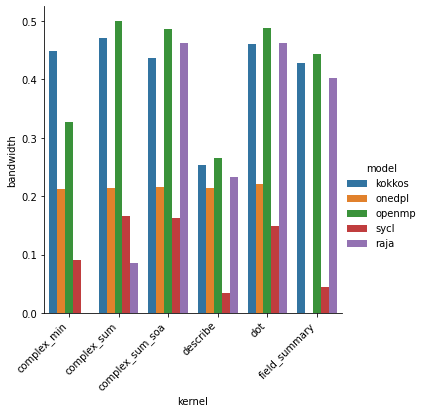

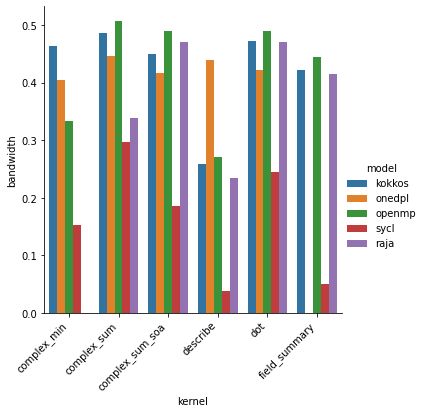

In [4]:
data = pd.read_csv("./clx-results.csv", skipinitialspace=True)
vals = average('clx')
vals['bandwidth'] /= arch_peaks['Xeon 6230']*2
plot('clx', vals)
data = pd.read_csv("./clx-1S-results.csv", skipinitialspace=True)
vals = average('clx_1S')
vals['bandwidth'] /= arch_peaks['Xeon 6230']
plot('clx_1S', vals)

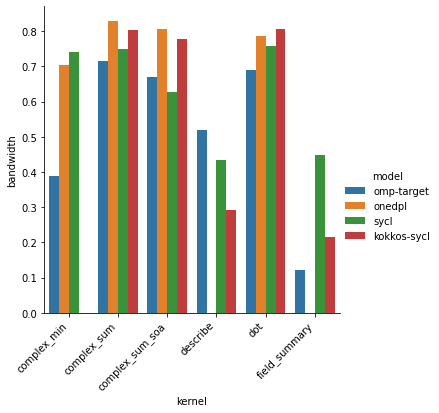

In [5]:
data = pd.read_csv("./gen9-results.csv", skipinitialspace=True)
vals = average('gen9')
vals['bandwidth'] /= arch_peaks['Core 6770HQ']
plot('gen9', vals)

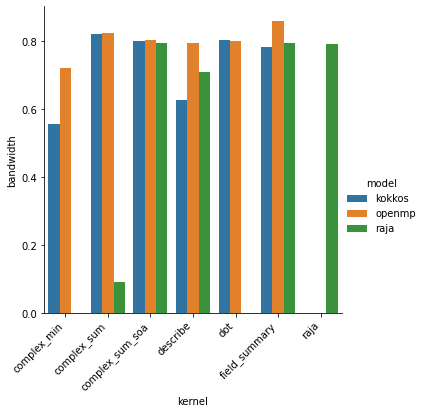

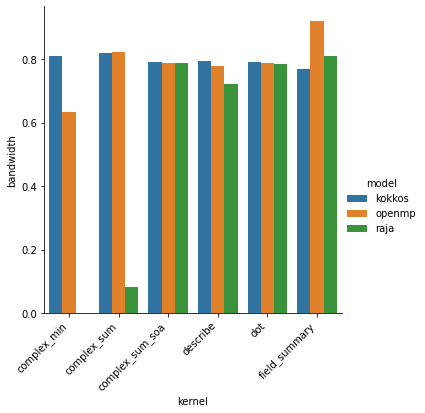

In [6]:
data = pd.read_csv("./rome-results-cce.csv", skipinitialspace=True)
vals = average_c('rome', 'cce')
vals['bandwidth'] /= arch_peaks['EPYC 7742']*2
plot('rome_cce', vals)
data = pd.read_csv("./rome-results-aocc.csv", skipinitialspace=True)
vals = average_c('rome', 'aocc')
vals['bandwidth'] /= arch_peaks['EPYC 7742']*2
plot('rome_aocc', vals)

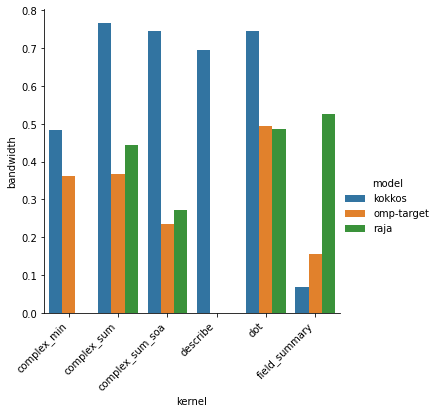

In [7]:
data = pd.read_csv("./mi100-results.csv", skipinitialspace=True)
vals = average('mi100')
vals['bandwidth'] /= arch_peaks['mi100']
plot('mi100', vals)

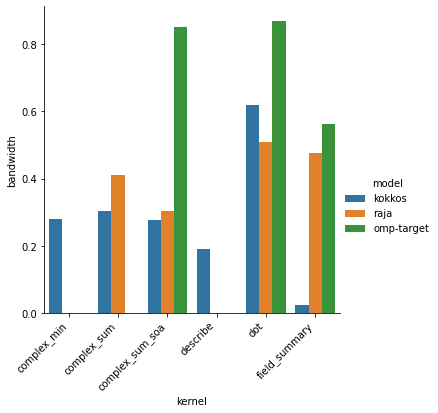

In [8]:
data = pd.read_csv("./a100-results.csv", skipinitialspace=True)
vals = average('a100')
vals['bandwidth'] /= arch_peaks['a100']
plot('a100', vals)